In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
print(len(train_input[0]), len(train_input[1]))

218 189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])  # 1은 긍정 0은 부정

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np
lengths = [len(x) for x in train_input]

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


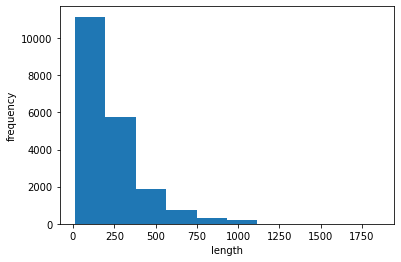

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [12]:
print(train_input.shape, train_seq.shape)

(20000,) (20000, 100)


In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [15]:
val_seq = pad_sequences(val_input, maxlen=100)

In [16]:
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Dense
model = keras.Sequential()
model.add(SimpleRNN(8, input_shape=(100, 500)))
model.add(Dense(1, activation='sigmoid'))

In [17]:
train_oh = keras.utils.to_categorical(train_seq)

In [18]:
print(train_oh.shape)

(20000, 100, 500)


In [22]:
print(train_oh[0][0][:12])  # train_oh[0].shape = (100, 500) , train_oh[0][0].shape = (500, )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [23]:
val_oh= keras.utils.to_categorical(val_seq)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 59ms/step - loss: 0.6934 - accuracy: 0.5178 - val_loss: 0.6823 - val_accuracy: 0.5610
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6593 - accuracy: 0.6041 - val_loss: 0.6327 - val_accuracy: 0.6460
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6136 - accuracy: 0.6721 - val_loss: 0.5938 - val_accuracy: 0.6970
Epoch 4/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5780 - accuracy: 0.7114 - val_loss: 0.5664 - val_accuracy: 0.7238
Epoch 5/100
313/313 [==============================] - 24s 77ms/step - loss: 0.5528 - accuracy: 0.7347 - val_loss: 0.5466 - val_accuracy: 0.7364
Epoch 6/100
313/313 [==============================] - 21s 68ms/step - loss: 0.5329 - accuracy: 0.7491 - val_loss: 0.5322 - val_accuracy: 0.7442
Epoch 7/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5167 - accuracy: 0.7617 - val_loss: 0.5176 - val_ac

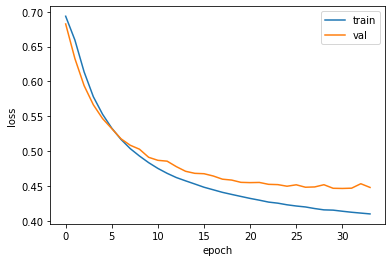

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(SimpleRNN(8))
model2.add(Dense(1, activation='sigmoid'))

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [33]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 51ms/step - loss: 0.6945 - accuracy: 0.5055 - val_loss: 0.6930 - val_accuracy: 0.5122
Epoch 2/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6915 - accuracy: 0.5221 - val_loss: 0.6922 - val_accuracy: 0.5164
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6890 - accuracy: 0.5381 - val_loss: 0.6922 - val_accuracy: 0.5168
Epoch 4/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6860 - accuracy: 0.5559 - val_loss: 0.6905 - val_accuracy: 0.5338
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6773 - accuracy: 0.6059 - val_loss: 0.6754 - val_accuracy: 0.6114
Epoch 6/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6587 - accuracy: 0.6693 - val_loss: 0.6556 - val_accuracy: 0.6686
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6366 - accuracy: 0.7050 - val_loss: 0.6361 - val_accurac

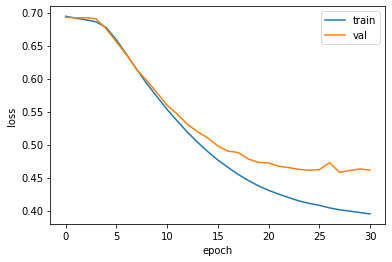

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# LSTM과 GRU 셀

In [36]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [37]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [40]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(Dense(1, activation='sigmoid'))

In [41]:
rmsprop = keras.optimizers.RMSprop(1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 25s 67ms/step - loss: 0.6925 - accuracy: 0.5434 - val_loss: 0.6917 - val_accuracy: 0.5788
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6903 - accuracy: 0.6075 - val_loss: 0.6885 - val_accuracy: 0.6320
Epoch 3/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6847 - accuracy: 0.6439 - val_loss: 0.6799 - val_accuracy: 0.6516
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6631 - accuracy: 0.6726 - val_loss: 0.6365 - val_accuracy: 0.6924
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6044 - accuracy: 0.7172 - val_loss: 0.5936 - val_accuracy: 0.7190
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5761 - accuracy: 0.7343 - val_loss: 0.5719 - val_accuracy: 0.7290
Epoch 7/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5550 - accuracy: 0.7495 - val_loss: 0.5519 - val_ac

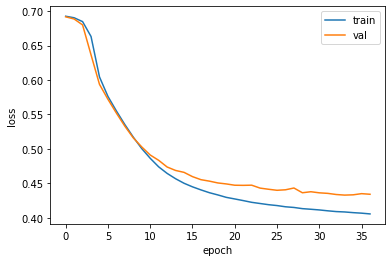

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [43]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

In [44]:
rmsprop = keras.optimizers.RMSprop(1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 46ms/step - loss: 0.6925 - accuracy: 0.5408 - val_loss: 0.6917 - val_accuracy: 0.5776
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6904 - accuracy: 0.5997 - val_loss: 0.6887 - val_accuracy: 0.6332
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6854 - accuracy: 0.6499 - val_loss: 0.6810 - val_accuracy: 0.6596
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6700 - accuracy: 0.6633 - val_loss: 0.6481 - val_accuracy: 0.6754
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6129 - accuracy: 0.7155 - val_loss: 0.5846 - val_accuracy: 0.7320
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5722 - accuracy: 0.7358 - val_loss: 0.5587 - val_accuracy: 0.7390
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5462 - accuracy: 0.7434 - val_loss: 0.5348 - val_ac

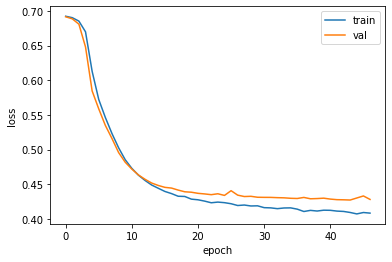

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [48]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(Dense(1, activation='sigmoid'))

In [49]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [52]:
rmsprop = keras.optimizers.RMSprop(1e-4)

model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 35s 95ms/step - loss: 0.6928 - accuracy: 0.5158 - val_loss: 0.6922 - val_accuracy: 0.5940
Epoch 2/100
313/313 [==============================] - 29s 91ms/step - loss: 0.6906 - accuracy: 0.6045 - val_loss: 0.6877 - val_accuracy: 0.6374
Epoch 3/100
313/313 [==============================] - 28s 91ms/step - loss: 0.6784 - accuracy: 0.6380 - val_loss: 0.6610 - val_accuracy: 0.6638
Epoch 4/100
313/313 [==============================] - 28s 90ms/step - loss: 0.6195 - accuracy: 0.6942 - val_loss: 0.5868 - val_accuracy: 0.7106
Epoch 5/100
313/313 [==============================] - 28s 90ms/step - loss: 0.5639 - accuracy: 0.7268 - val_loss: 0.5503 - val_accuracy: 0.7324
Epoch 6/100
313/313 [==============================] - 28s 90ms/step - loss: 0.5327 - accuracy: 0.7438 - val_loss: 0.5214 - val_accuracy: 0.7480
Epoch 7/100
313/313 [==============================] - 29s 91ms/step - loss: 0.5112 - accuracy: 0.7584 - val_loss: 0.5008 - val_ac

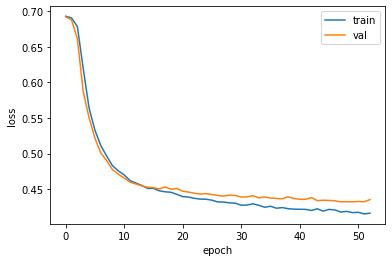

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [53]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(Dense(1, activation='sigmoid'))

In [54]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [56]:
rmsprop = keras.optimizers.RMSprop(1e-4)

model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 51ms/step - loss: 0.6925 - accuracy: 0.5427 - val_loss: 0.6920 - val_accuracy: 0.5544
Epoch 2/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6908 - accuracy: 0.5735 - val_loss: 0.6901 - val_accuracy: 0.5778
Epoch 3/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6882 - accuracy: 0.6005 - val_loss: 0.6871 - val_accuracy: 0.5952
Epoch 4/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6837 - accuracy: 0.6183 - val_loss: 0.6818 - val_accuracy: 0.6098
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6757 - accuracy: 0.6360 - val_loss: 0.6723 - val_accuracy: 0.6282
Epoch 6/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6610 - accuracy: 0.6539 - val_loss: 0.6537 - val_accuracy: 0.6482
Epoch 7/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6298 - accuracy: 0.6729 - val_loss: 0.6110 - val_ac

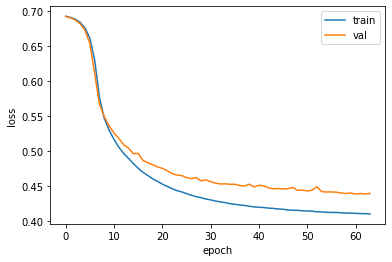

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [58]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 14s 15ms/step - loss: 0.4255 - accuracy: 0.8010


[0.4254753589630127, 0.8009999990463257]